In [1]:
import numpy as np

In [2]:
def conviulution_kernel(kernel_list, input_image):
    kernel_size_xy = kernel_list.shape[0]
    results = np.zeros((input_image.shape))
    for yPosition in range(input_image.shape[0] - kernel_size_xy):
        for xPosition in range(input_image.shape[1] - kernel_size_xy):
            windowArea = input_image[yPosition:yPosition + kernel_size_xy,
                                    xPosition:xPosition + kernel_size_xy]
            applied_kernel = windowArea * kernel_list
            results[yPosition, xPosition] = np.sum(applied_kernel)
    return results

In [3]:
# https://en.wikipedia.org/wiki/Lucas%E2%80%93Kanade_method

def lucas_kernel(inputdimensions, window_size=3):    
    heigth, width = inputdimensions[0].shape
    v = np.zeros((heigth, width, 2))   
    for yPosition in range(inputdimensions[0].shape[0] - window_size):
        for xPosition in range(inputdimensions[0].shape[1] - window_size):
            
            image_x = inputdimensions[0][yPosition:yPosition+window_size,
                                    xPosition:xPosition+window_size].flatten()
            image_y = inputdimensions[1][yPosition:yPosition+window_size,
                                    xPosition:xPosition+window_size].flatten()
            image_t = inputdimensions[2][yPosition:yPosition+window_size,
                                    xPosition:xPosition+window_size].flatten()
            
            A = np.vstack((image_x, image_y)).T 
            b = np.reshape(image_t, (image_t.shape[0], 1)) 
            
            v[yPosition, xPosition] = np.dot(np.linalg.pinv(A), b).reshape(2)     
    return v

In [4]:
def optical_flow(image_old, image_new):
    kernel_x = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]
                        ])
    
    kernel_y = np.array([[1, 2, 1], 
                         [0, 0, 0],
                         [-1, -2, -1]
                        ])

    kernel_t = np.array([[1, 1, 1], 
                        [1, 1, 1],
                        [1, 1, 1]])
    
    conviulution_x = conviulution_kernel(kernel_x, image_new)
    conviulution_y = conviulution_kernel(kernel_y, image_new)
    conviulution_t = conviulution_kernel(kernel_t, image_new) + conviulution_kernel(-kernel_t, image_old)
        
    dimension_array = np.array([conviulution_x, conviulution_y, conviulution_t])    
    return lucas_kernel(dimension_array)

In [5]:
!wget -c "https://sandipanweb.files.wordpress.com/2018/02/rubic.gif"

--2019-05-07 16:03:21--  https://sandipanweb.files.wordpress.com/2018/02/rubic.gif
Resolving sandipanweb.files.wordpress.com (sandipanweb.files.wordpress.com)... 192.0.72.18, 192.0.72.19
Connecting to sandipanweb.files.wordpress.com (sandipanweb.files.wordpress.com)|192.0.72.18|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [6]:
from PIL import Image
from PIL import GifImagePlugin
import matplotlib.pyplot as plt
%matplotlib inline

image1 = Image.open("rubic.gif")
image2 = Image.open("rubic.gif")

image1.seek(0)
image2.seek(1)

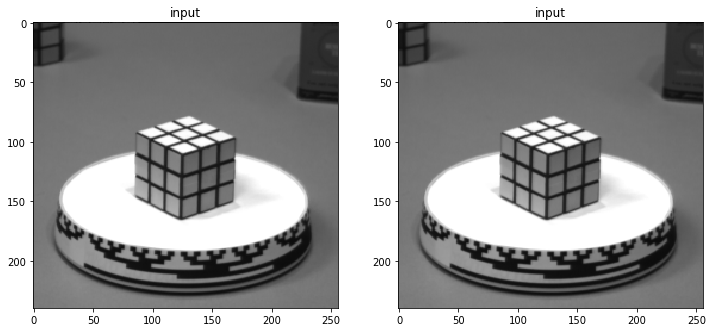

In [7]:
figure, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].set_title("input")
axes[0].imshow(image1)
axes[1].set_title("input")
axes[1].imshow(image2)

In [8]:
v = optical_flow(np.array(image1), np.array(image2))

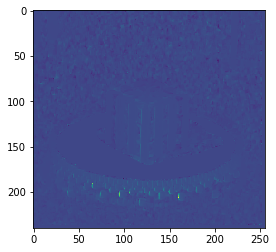

In [9]:
plt.imshow(v[:, :, 0])

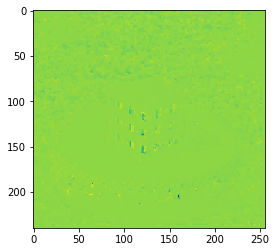

In [10]:
plt.imshow(v[:, :, 1])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


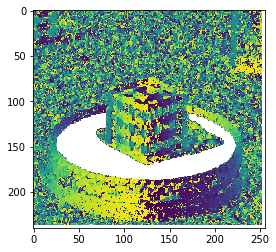

In [11]:
plt.imshow(np.arctan(v[:, :, 0]/v[:, :, 1]))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


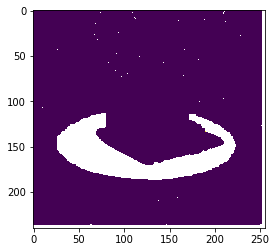

In [12]:
plt.imshow((v[:, :, 0] + v[:, :, 1]) ** (-2))

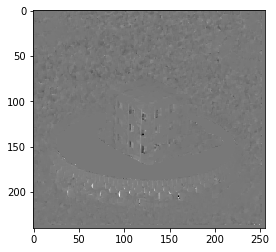

In [13]:
plt.imshow( (v[:, :, 0] + v[:, :, 1]) * 100, cmap="gray")

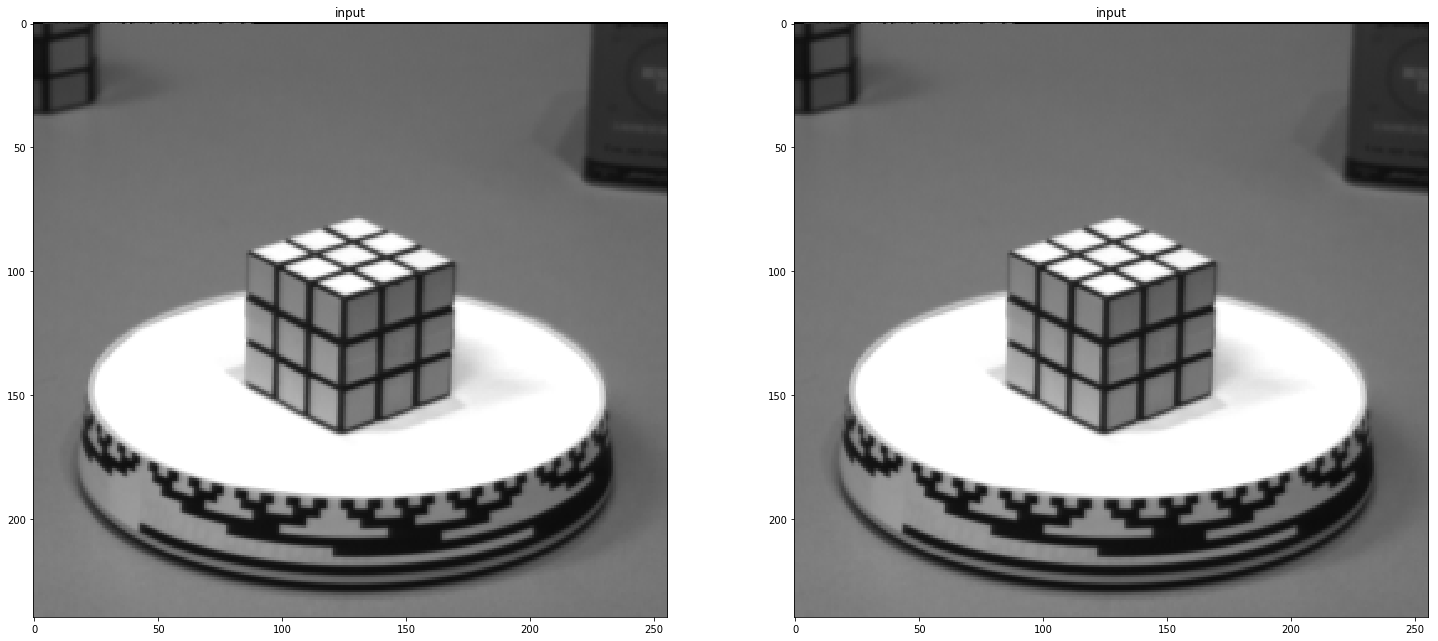

In [14]:
figure, axes = plt.subplots(1, 2, figsize=(25, 25))
axes[0].set_title("input")
axes[0].imshow(image1)
axes[1].set_title("input")
axes[1].imshow(image2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


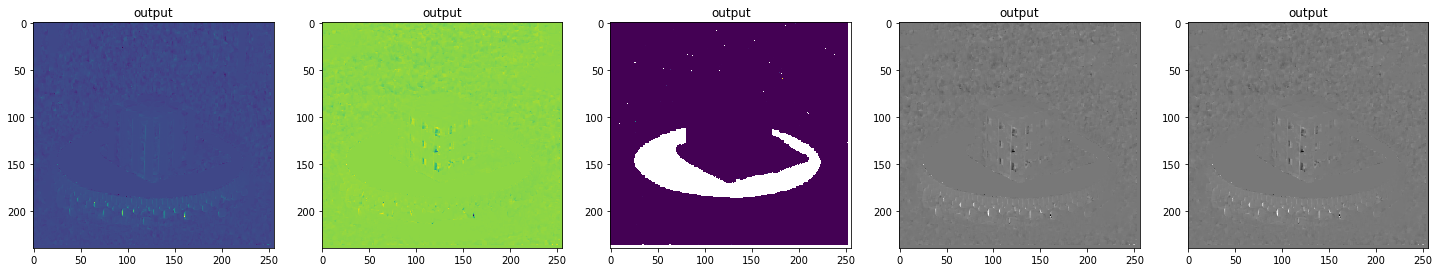

In [15]:
figure, axes = plt.subplots(1, 5, figsize=(25, 25))
axes[0].set_title("output")
axes[0].imshow(v[:, :, 0])
axes[1].set_title("output")
axes[1].imshow(v[:, :, 1])
axes[2].set_title("output")
axes[2].imshow(v[:, :, 0] + v[:, :, 1] ** (-2))
axes[3].set_title("output")
axes[3].imshow((v[:, :, 0] + v[:, :, 1]) * 100, cmap="gray")
axes[4].set_title("output")
axes[4].imshow((v[:, :, 0] + v[:, :, 1]) * 100, cmap="gray")